<h1>Creating the dataset</h1>

0 is for the face masked human face and 1 is for the human face.

In [26]:
import cv2 as cv 
import pandas as pd 
import numpy as np 


In [28]:
# img = cv.imread('../croped_images/masked_faces/0.jpg')

In [29]:
# img.shape

(125, 125, 3)

In [30]:
# img.reshape(1,125*125*3) 

array([[248, 244, 249, ..., 176, 164, 162]], dtype=uint8)

In [27]:
import matplotlib.pyplot as plt 

In [42]:
# img2 = cv.imread('../croped_images/human_faces/0.jpg')
# img2.shape
# img2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
# plt.imshow(img2, cmap='gray')
# cv.imshow('frame',img2)
# cv.waitKey(0)

(132, 132, 3)

In [28]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [64]:
# img3 = w2d(img2, 'db1',5)

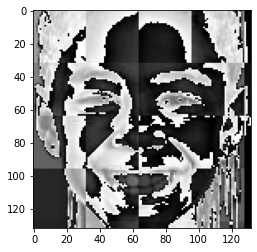

In [65]:
# plt.imshow(img3, cmap='gray')

<h2>Creating the dataframe of the face masked human faces</h2>

In [29]:
import os

In [30]:
dir_list = os.listdir('../croped_images/masked_faces')
data_frame = pd.DataFrame()
for i in range(len(dir_list)):
    img = cv.imread(f'../croped_images/masked_faces/{dir_list[i]}')
    img = cv.resize(img,(30,30))
    # img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    wave = w2d(img, 'db1',5)

    data_frame = pd.concat([data_frame, pd.DataFrame(np.concatenate((img.reshape(1,30*30*3),wave.reshape(1,-1)), axis=1))])
    
    

C:\python\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [31]:
data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,224,224,224,219,219,219,240,238,238,229,...,202,196,168,18,233,37,46,42,47,44
0,46,45,47,48,47,49,55,54,56,59,...,148,154,170,195,195,164,159,152,146,138
0,248,244,248,249,242,245,50,44,35,48,...,24,248,252,109,157,198,214,210,252,251
0,235,241,231,232,240,233,230,240,227,103,...,19,56,83,84,89,90,14,234,242,55
0,167,169,170,156,166,169,129,141,153,55,...,66,59,56,46,12,0,9,15,19,22


In [32]:
data_frame.shape

(507, 3600)

In [33]:
data_frame.index = np.arange(507)

In [34]:
data_frame

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,224,224,224,219,219,219,240,238,238,229,...,202,196,168,18,233,37,46,42,47,44
1,46,45,47,48,47,49,55,54,56,59,...,148,154,170,195,195,164,159,152,146,138
2,248,244,248,249,242,245,50,44,35,48,...,24,248,252,109,157,198,214,210,252,251
3,235,241,231,232,240,233,230,240,227,103,...,19,56,83,84,89,90,14,234,242,55
4,167,169,170,156,166,169,129,141,153,55,...,66,59,56,46,12,0,9,15,19,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,83,129,117,81,123,115,81,119,113,81,...,65,66,64,71,71,21,247,242,183,165
503,95,130,126,100,146,146,68,88,126,84,...,194,184,184,179,164,158,155,163,160,177
504,183,196,219,150,161,181,117,125,143,95,...,136,164,195,234,254,14,15,5,18,23
505,152,156,160,35,48,71,0,3,12,3,...,63,254,5,22,17,13,249,22,51,61


In [35]:
data_frame['target'] = np.full((507,1),0)

In [36]:
data_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,target
0,224,224,224,219,219,219,240,238,238,229,...,196,168,18,233,37,46,42,47,44,0
1,46,45,47,48,47,49,55,54,56,59,...,154,170,195,195,164,159,152,146,138,0
2,248,244,248,249,242,245,50,44,35,48,...,248,252,109,157,198,214,210,252,251,0
3,235,241,231,232,240,233,230,240,227,103,...,56,83,84,89,90,14,234,242,55,0
4,167,169,170,156,166,169,129,141,153,55,...,59,56,46,12,0,9,15,19,22,0


<h2>Creating the dataframe of the human faces</h2>

In [37]:
dir_list = os.listdir('../croped_images/human_faces')
data_frame_2 = pd.DataFrame()
for i in range(len(dir_list)):
    img = cv.imread(f'../croped_images/human_faces/{dir_list[i]}')
    img = cv.resize(img,(30,30))
    # img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    wave = w2d(img, 'db1',5)

    data_frame_2 = pd.concat([data_frame_2, pd.DataFrame(np.concatenate((img.reshape(1,30*30*3),wave.reshape(1,-1)), axis=1))])

C:\python\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [38]:
data_frame_2.shape

(508, 3600)

In [39]:
data_frame_2['target'] = np.full((508,1),1)

In [40]:
data_frame_2

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,target
0,206,200,193,54,53,61,35,35,43,16,...,69,36,26,0,158,140,148,171,157,1
0,215,225,230,209,221,226,8,15,21,19,...,207,151,157,168,183,203,208,213,220,1
0,175,175,174,55,65,83,40,53,68,45,...,238,4,202,172,181,198,207,185,176,1
0,111,125,147,67,78,96,65,74,92,33,...,171,158,158,159,159,159,172,175,226,1
0,48,54,66,117,123,134,13,14,18,14,...,239,245,245,242,246,249,251,254,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,216,222,217,243,243,242,210,213,217,209,...,249,187,8,60,63,60,51,35,21,1
0,252,250,250,235,230,234,154,162,188,186,...,17,249,3,63,157,191,174,151,150,1
0,45,41,43,31,33,33,28,25,27,28,...,207,202,204,201,208,238,219,209,198,1
0,85,118,171,62,89,138,63,86,131,93,...,237,225,228,236,235,202,156,169,185,1


In [41]:
data_frame_2.index = np.arange(508)

In [42]:
data_frame_2

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,target
0,206,200,193,54,53,61,35,35,43,16,...,69,36,26,0,158,140,148,171,157,1
1,215,225,230,209,221,226,8,15,21,19,...,207,151,157,168,183,203,208,213,220,1
2,175,175,174,55,65,83,40,53,68,45,...,238,4,202,172,181,198,207,185,176,1
3,111,125,147,67,78,96,65,74,92,33,...,171,158,158,159,159,159,172,175,226,1
4,48,54,66,117,123,134,13,14,18,14,...,239,245,245,242,246,249,251,254,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,216,222,217,243,243,242,210,213,217,209,...,249,187,8,60,63,60,51,35,21,1
504,252,250,250,235,230,234,154,162,188,186,...,17,249,3,63,157,191,174,151,150,1
505,45,41,43,31,33,33,28,25,27,28,...,207,202,204,201,208,238,219,209,198,1
506,85,118,171,62,89,138,63,86,131,93,...,237,225,228,236,235,202,156,169,185,1


<h2>Combining the data_frame and data_frame_2</h2>

In [43]:
final_dataframe = pd.concat([data_frame,data_frame_2])

In [44]:
final_dataframe.shape

(1015, 3601)

In [45]:
final_dataframe

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,target
0,224,224,224,219,219,219,240,238,238,229,...,196,168,18,233,37,46,42,47,44,0
1,46,45,47,48,47,49,55,54,56,59,...,154,170,195,195,164,159,152,146,138,0
2,248,244,248,249,242,245,50,44,35,48,...,248,252,109,157,198,214,210,252,251,0
3,235,241,231,232,240,233,230,240,227,103,...,56,83,84,89,90,14,234,242,55,0
4,167,169,170,156,166,169,129,141,153,55,...,59,56,46,12,0,9,15,19,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,216,222,217,243,243,242,210,213,217,209,...,249,187,8,60,63,60,51,35,21,1
504,252,250,250,235,230,234,154,162,188,186,...,17,249,3,63,157,191,174,151,150,1
505,45,41,43,31,33,33,28,25,27,28,...,207,202,204,201,208,238,219,209,198,1
506,85,118,171,62,89,138,63,86,131,93,...,237,225,228,236,235,202,156,169,185,1


In [25]:
# saving the final_dataframe to a csv file.
# final_dataframe.to_csv('data_2.csv', index=False)